In [1]:
## Estimate Linear Velocity from 3D time-series displacement on Fernandina Volcano

import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

work_dir = os.path.expanduser('~/development/python/a_python_guide_to_geophysics/FernandinaSenDT128')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/development/python/a_python_guide_to_geophysics/FernandinaSenDT128


Data dimension: (972, 1152)


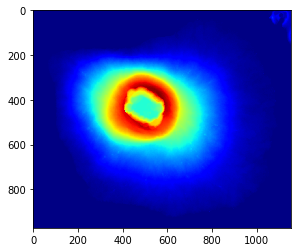

In [14]:
## read HDF5 file
dem_file = 'dem.h5'
f = h5py.File(dem_file, 'r')
dem = f['demLat_S02_N01_Lon_W092_W090'][:]
atr = dict(f.attrs)
f.close()
print('Data dimension:', dem.shape)

# display
plt.figure()
plt.imshow(dem, cmap='jet')
plt.show()

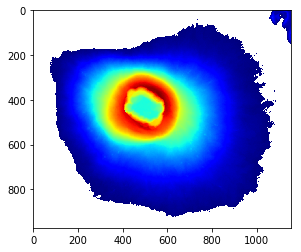

In [7]:
# mask out area with height < 10 m (water)
dem[dem < 10] = np.nan
plt.figure()
plt.imshow(dem, cmap='jet')
plt.show()

In [18]:
## write HDF5 file
f = h5py.File('dem_masked.h5', 'w')
f.create_dataset('masked_height', data=dem)
for key, value in atr.items():
    f.attrs[key] = value
f.close()